# Automatic extraction of time series features 

In order to correlate the CNN model performance with the properties of the groundwater time series, different libraries are applied ( kats, tsfresh, tsfel and tsfeatures) to rapidly obtain different parameters that allow us to understand and interpret the modeled results. 


In [32]:
%matplotlib notebook
import pandas as pd
import geopandas as gpd
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=Warning)
from tsfeatures import tsfeatures
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tsfresh import extract_features

from tsfeatures import stability, series_length, flat_spots, stl_features,acf_features,pacf_features

In [37]:
#Read Pickle
rpath="D:/Erasmus/Thesis/data"
GWfilldatamod=pd.read_pickle(rpath+"/Pickle/GWfilldatamod2.pkl")
gw_sel_int=gpd.read_file(rpath+"/SHP/SHP2/gw_sel_int.shp")
gw_sel_int['r2+NSE']=gw_sel_int['r2']+gw_sel_int['NSE']
gw_sel_int['r2_2+NSE_2']=gw_sel_int['r2_2']+gw_sel_int['NSE_2']

## Extract features available in TSfeatures library

__Stability , lumpiness__: Stability and lumpiness are two time series features based on tiled (non-overlapping) windows. Means or variances are produced for all tiled windows. Then stability is the variance of the means, while lumpiness is the variance of the variances.

In [38]:
#List of available features
ltsfeatures=[ 'series_length', 'stability', 'trend', 
             'seasonal_strength', 'seas_pacf', 'flat_spots', 
             'x_acf1', 'x_acf10', 'seas_acf1']
for i in ltsfeatures:
    gw_sel_int[i]=np.nan

### Feature extraction per well

In [39]:
cou=0
for dfraw in GWfilldatamod.GW_NN:
    
    df=dfraw[[dfraw.columns[0],dfraw.columns[-1]]]
    df["unique_id"]=[dfraw.columns[-1]]*len(df)  #give the unique code as the library requested it 
    
    #well id as an integer to search in the gw_sel file--> shapefile witht the well locations
    wellid=int(dfraw.columns[-1].split("_")[-1])
    cou+=1
    indv=gw_sel_int[gw_sel_int.MEST_ID==wellid].index[0]
    
    #Copy the dataframe to avoid modifications in the original one. 
    dfc=df.copy()
    dfc.rename(columns={dfraw.columns[0]: "ds", dfraw.columns[-1]: "y"}, inplace=True)
    feat=tsfeatures(dfc, freq=30, features=[series_length,stability, flat_spots, stl_features,acf_features,pacf_features])
    #print(feat)
    for c in ltsfeatures:
        gw_sel_int.at[indv,c]=feat[c][0] 
    
    

## Extract features available in tsfresh library

__Sample entropy__: Approximate Entropy and Sample Entropy are two algorithms for determining the regularity of series of data based on the existence of patterns. (ncbi.nlm.nih.gov/pmc/articles/PMC7515030/) 

__cid_ce__: This function calculator is an estimate for a time series complexity [1] (A more complex time series has more peaks, valleys etc.). 

__autocorrelation__:Calculates the autocorrelation of the specified lag

__Partial correlation__: is a method used to describe the relationship between two variables whilst taking away the effects of another variable, or several other variables, on this relationship.

__number_of_peaks__: Calculates the number of peaks of at least support n in the time series x. A peak of support n is defined as a subsequence of x where a value occurs, which is bigger than its n neighbours to the left and to the right.

__Lempel–Ziv complexity__ : The Lempel-Ziv complexity (LZ) is a popular tool to quantify the uncertainty contained in time series data. In particular, LZ measures how “diverse” are the patterns that are present in a particular signal. (https://information-dynamics.github.io/complexity/information/2019/06/26/lempel-ziv.html)

__Matrix profile__ : The distance profile is a vector of minimum Z-Normalized Euclidean Distances.The profile index contains the index of its first nearest-neighbor. In other words, it is the location of its most similar sub-sequence. (https://towardsdatascience.com/introduction-to-matrix-profiles-5568f3375d90) 

In [41]:
#List of features with high-correlation according to previous checks
lfeatures=['y__longest_strike_below_mean','y__longest_strike_above_mean',
              'y__fourier_entropy__bins_3', 'y__matrix_profile__feature_"mean"__threshold_0.98',
                'y__sample_entropy', 'y__cid_ce__normalize_True', 'y__autocorrelation__lag_6', 
               'y__lempel_ziv_complexity__bins_3','y__partial_autocorrelation__lag_3', 
               'y__number_peaks__n_10', 'y__approximate_entropy__m_2__r_0.5']

In [42]:

for dfraw in GWfilldatamod.GW_NN:
    df=dfraw[[dfraw.columns[0],dfraw.columns[-1]]]
    df["id"]=[dfraw.columns[-1]]*len(df)  #give the unique code as the library requested it 
    
    #well id as an integer to search in the gw_sel file--> shapefile witht the well locations
    wellid=int(dfraw.columns[-1].split("_")[-1])
    indv=gw_sel_int[gw_sel_int.MEST_ID==wellid].index[0]
    
    #Copy the dataframe to avoid modifications in the original one. 
    dfc=df.copy()
    dfc.rename(columns={dfraw.columns[0]: "time", dfraw.columns[-1]: "y"}, inplace=True)
    feat=extract_features(dfc, column_id="id", column_sort="time")
    
    for c in lfeatures:
        gw_sel_int.at[indv,c]=feat[c][0] 

Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:08<00:00,  8.30s/it]


Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:08<00:00,  8.04s/it]


Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:07<00:00,  7.97s/it]


Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.68s/it]


Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:11<00:00, 11.20s/it]


Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:08<00:00,  8.58s/it]


Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:07<00:00,  7.52s/it]


Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:08<00:00,  8.06s/it]


## Extract Spearmann coefficient

In [137]:
#Join list of features
ltsfeatures=[ 'series_length', 'stability', 'trend', 
             'seasonal_strength', 'flat_spots', 'seas_acf1']
lfeatures=['y__longest_strike_below_mean','y__longest_strike_above_mean',
              'y__fourier_entropy__bins_3', 'y__matrix_profile__feature_"mean"__threshold_0.98',
                'y__sample_entropy',  'y__autocorrelation__lag_6', 
               'y__lempel_ziv_complexity__bins_3','y__partial_autocorrelation__lag_3', 
               'y__number_peaks__n_10', 'y__approximate_entropy__m_2__r_0.5']
all_features=ltsfeatures+lfeatures
gw_sel_int[all_features]

,series_length,stability,trend,seasonal_strength,flat_spots,seas_acf1,y__longest_strike_below_mean,y__longest_strike_above_mean,y__fourier_entropy__bins_3,"y__matrix_profile__feature_""mean""__threshold_0.98",y__sample_entropy,y__autocorrelation__lag_6,y__lempel_ziv_complexity__bins_3,y__partial_autocorrelation__lag_3,y__number_peaks__n_10,y__approximate_entropy__m_2__r_0.5
0,592.0,0.082573,0.134237,0.087312,6.0,-0.437108,11.0,15.0,0.079983,1.810894,1.469238,-0.372559,0.189189,-0.241762,26.0,0.838546
1,476.0,0.059715,0.071331,0.103283,9.0,-0.535319,17.0,16.0,0.079983,1.687081,1.710678,-0.508121,0.220588,-0.228476,20.0,0.979764
2,379.0,0.098787,0.290659,0.117548,7.0,-0.374308,20.0,18.0,0.183378,1.262183,1.317955,-0.092880,0.203166,-0.133828,17.0,0.708506
3,573.0,0.121807,0.211958,0.113806,8.0,-0.393054,9.0,11.0,0.125256,1.870703,1.303873,-0.272862,0.188482,-0.297885,23.0,0.766135
4,598.0,0.169460,0.219871,0.081691,7.0,-0.417612,22.0,19.0,0.090729,1.669564,1.494476,-0.272368,0.187291,-0.140223,32.0,0.789043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,278.0,0.106293,0.110449,0.149600,6.0,-0.479030,9.0,9.0,0.090729,1.609610,1.210662,-0.464895,0.230216,-0.218563,15.0,0.804259
501,256.0,0.133299,0.215428,0.314928,5.0,-0.213675,10.0,19.0,0.125256,1.977888,0.830880,-0.288653,0.238281,-0.257583,13.0,0.551084
502,256.0,0.188779,0.308242,0.409320,4.0,-0.080863,18.0,19.0,0.155665,2.431115,0.690597,-0.128197,0.230469,-0.016490,9.0,0.501710
503,564.0,0.418150,0.687198,0.132386,11.0,-0.117699,91.0,70.0,0.247940,2.244444,0.613914,0.530416,0.138298,0.076496,19.0,0.376934


In [138]:
perfor=['r2','NSE', 'r2_2', 'NSE_2','r2+NSE','r2_2+NSE_2']

#Create dataframe to store the correlations
lzero=np.zeros(len(all_features))
d = {'variable': all_features, 'r2': lzero,'NSE':lzero, 'r2_2':lzero, 'NSE_2':lzero}
dfrval = pd.DataFrame(data=d)
dfslope = pd.DataFrame(data=d)
spearm =pd.DataFrame(data=d)
kendalltau= pd.DataFrame(data=d)
#gw_sel_intc=gw_sel_int.copy()

for p in perfor:
    lslope, lrvalue,spearv, kendv = [],[],[],[]
    
    for col in all_features:
        slope, intercept, r_value, p_value, std_err = stats.linregress(gw_sel_int[col], 
                                                                       gw_sel_int[p])
        lrvalue.append(round(r_value,2)) if p_value <= 0.1 else lrvalue.append(0)
        lslope.append(round(slope,2))
        
        
        #Spearman's rank correlation coefficient
        spear, pvalspear=stats.spearmanr(gw_sel_int[col], gw_sel_int[p])
        spearv.append(round(spear,2)) if pvalspear <= 0.1 else spearv.append(0)
        
        #Kendall's tau 
        kendall, pvalkendall=stats.kendalltau(gw_sel_int[col], gw_sel_int[p])
        kendv.append(round(kendall,2)) if pvalkendall <= 0.1 else kendv.append(0)
                        
    dfslope[p]=lslope
    dfrval[p]=lrvalue
    
    spearm[p]=spearv
    kendalltau[p]=kendv
    

In [139]:
dfrvalcc=spearm.copy()
dfrvalcc.rename(columns={"r2": "r$^2$_rh", "NSE": "NSE_rh",
                         "r2_2":"r$^2$","NSE_2":"NSE",
                         "r2+NSE":"r$^2$+NSE_rh","r2_2+NSE_2":"r$^2$+NSE"}, inplace=True)

In [140]:
dfaux=dfrvalcc[(dfrvalcc["r$^2$"] > -0.2)]
dfaux2=dfaux[(dfaux["r$^2$"] < 0.2)]
dfaux3=dfaux2[(dfaux2["NSE"] > -0.2)]
dfaux4=dfaux3[(dfaux3["NSE"] < 0.2)]
dfrvalcc2 = dfrvalcc.drop(dfaux4.index)

In [142]:
dictionary={
            'series_length': 'Series length', 
             'stability': 'Stability',
            'trend':  'Seasonal trend', 
             'seasonal_strength':'Seasonal strength', 
            'flat_spots': 'Flat spots',  
            'x_acf10': 'Sum of squares of autocorrelation coefficients', 
            'seas_acf1': 'Seasonal autocorrelation', 
    'y__longest_strike_below_mean': 'Longest strike below mean',
    'y__longest_strike_above_mean': 'Longest strike above mean',
    'y__fourier_entropy__bins_3': 'Fourier entropy',
    'y__matrix_profile__feature_"mean"__threshold_0.98': 'Matrix profile',
    'y__sample_entropy': 'Sample entropy', 
    'y__autocorrelation__lag_6':'Autocorrelation', 
     'y__lempel_ziv_complexity__bins_3': 'Lempel ziv complexity',
    'y__partial_autocorrelation__lag_3':'Partial autocorrelation', 
    'y__number_peaks__n_10': 'Number of peaks',
    'y__approximate_entropy__m_2__r_0.5': 'Approximate entropy'
}

dictionary2={
            'Seasonal autocorrelation':1, 'Seasonal strength':4, 'Autocorrelation':-1,
       'Partial autocorrelation':0, 'Flat spots':6, 'Stability':3, 'Seasonal trend':5,
       'Longest strike below mean':7, 'Fourier entropy':9,
       'Longest strike above mean':8, 'Matrix profile':10,
       'Sum of squares of autocorrelation coefficients':2, 'Sample entropy':12,
       'Approximate entropy':13, 'Lempel ziv complexity':14, 'Series length':11,
       'Number of peaks':15
}

dfrvalcc["variables_d"]=dfrvalcc['variable'].map(dictionary)
dfrvalcc["order"]=dfrvalcc['variables_d'].map(dictionary2)

In [143]:
dfrvalccf1=dfrvalcc.sort_values(by="order")
dfrvalccf2=dfrvalccf1.set_index('variables_d')
dfrvalccf=dfrvalccf2[dfrvalccf2.columns[1:-3]]

<IPython.core.display.Javascript object>


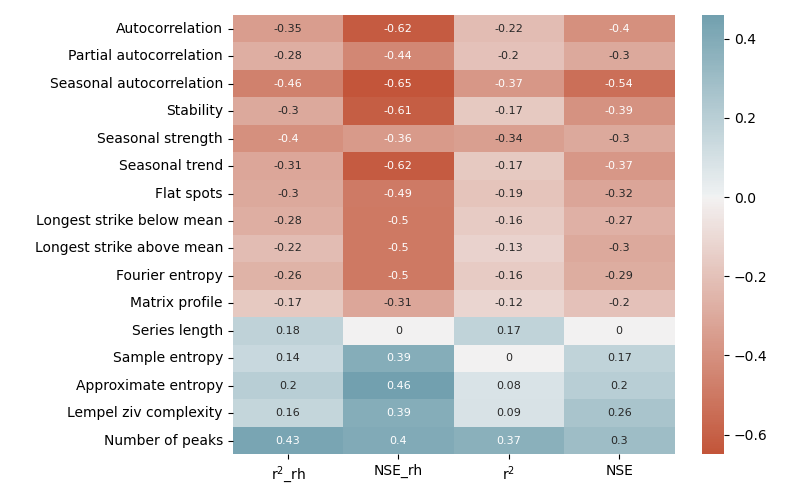

In [144]:

plt.figure(figsize=(8,5))
cmap = sns.diverging_palette(20, 220, as_cmap=True)
sns.heatmap(dfrvalccf, annot=True,cmap=cmap, center=0,  annot_kws={"size":8})
plt.ylabel(' ')
plt.tight_layout()